# CVRP Notebook
This notebook is intended to run the top level code for the CVRP

In [1]:
import networkx as nx

from model import VRP, create_constraints, output_variables
from pricer import VRPPricer
from parse import parse

from matplotlib import pyplot as plt

In [2]:
# Test instance E-n22-k4 provided by parser
G = parse("Instances/E/E-n22-k4.vrp")
# G = parse("Instances/E/E-n23-k3.vrp")
# G = parse("Instances/E/E-n30-k3.vrp")
# G = parse("Instances/E/E-n33-k4.vrp")
# G = parse("Instances/E/E-n51-k5.vrp")
# G = parse("Instances/E/E-n76-k14.vrp")
# G = parse("Instances/E/E-n101-k14.vrp")
# G = parse("Instances/Uchoa/X-n101-k25.vrp")
# G.graph['min_trucks'] = 26
# G = parse("Instances/Uchoa/X-n106-k14.vrp")
# G.graph['min_trucks'] = 14
# G = parse("Instances/Uchoa/X-n110-k13.vrp")
# G.graph['min_trucks'] = 13
# G = parse("Instances/Uchoa/X-n115-k10.vrp")
# G.graph['min_trucks'] = 10
# G = parse("Instances/Uchoa/X-n120-k6.vrp")
# G.graph['min_trucks'] = 6
# G = parse("Instances/Uchoa/X-n125-k30.vrp")
# G.graph['min_trucks'] = 30
# G = parse("Instances/Uchoa/X-n129-k18.vrp")
# G.graph['min_trucks'] = 18
# G = parse("Instances/Uchoa/X-n200-k36.vrp")
# G.graph['min_trucks'] = 36
# G = parse("Instances/Uchoa/X-n228-k23.vrp")
# G.graph['min_trucks'] = 23
# G = parse("Instances/Uchoa/X-n251-k28.vrp")
# G.graph['min_trucks'] = 28
# G = parse("Instances/Uchoa/X-n256-k16.vrp")
# G.graph['min_trucks'] = 16
# G = parse("Instances/Uchoa/X-n289-k60.vrp")
# G.graph['min_trucks'] = 61
# G = parse("Instances/Uchoa/X-n502-k39.vrp")
# G.graph['min_trucks'] = 39 #TODO: Ist dieses K auch das K, einer Optimallösung?

PARSE: Minimum number of trucks is 4


In [4]:
model = VRP(G)

# Create pricer
pricer = VRPPricer()
pricer.init_data(G)
pricer.data['methods'] = ["elementary"]
pricer.data['max_vars']= 10000
pricer.data['time_limit'] = 60

model.includePricer(pricer, "pricer","does pricing")

create_constraints(model,G,heuristic_time=1)

model.optimize()
model.hideOutput(quiet=False)

HYGESE: Found Solution with value 375.0
PRICER_PY: The maximal path length is 32
PY PRICING: The neighborhood has been fixed to 8 neighbors.
PRICER_C: Graph data successfully copied to C.
presolving:
presolving (1 rounds: 1 fast, 1 medium, 1 exhaustive):
 0 deleted vars, 0 deleted constraints, 0 added constraints, 0 tightened bounds, 0 added holes, 0 changed sides, 0 changed coefficients
 0 implications, 0 cliques
presolved problem has 25 variables (0 bin, 0 int, 0 impl, 25 cont) and 22 constraints
     22 constraints of type <linear>
Presolving Time: 0.00

 time | node  | left  |LP iter|LP it/n|mem/heur|mdpt |vars |cons |rows |cuts |sepa|confs|strbr|  dualbound   | primalbound  |  gap   | compl. 
* 0.0s|     1 |     0 |    10 |     - |    LP  |   0 |  25 |  22 |  22 |   0 |  0 |   0 |   0 |      --      | 3.750000e+02 |    Inf | unknown
  0.4s|     1 |     0 |    44 |     - |  5711k |   0 |1536 |  22 |  22 |   0 |  0 |   0 |   0 |      --      | 3.750000e+02 |    Inf | unknown
r 1.4s|

11982.756058916864


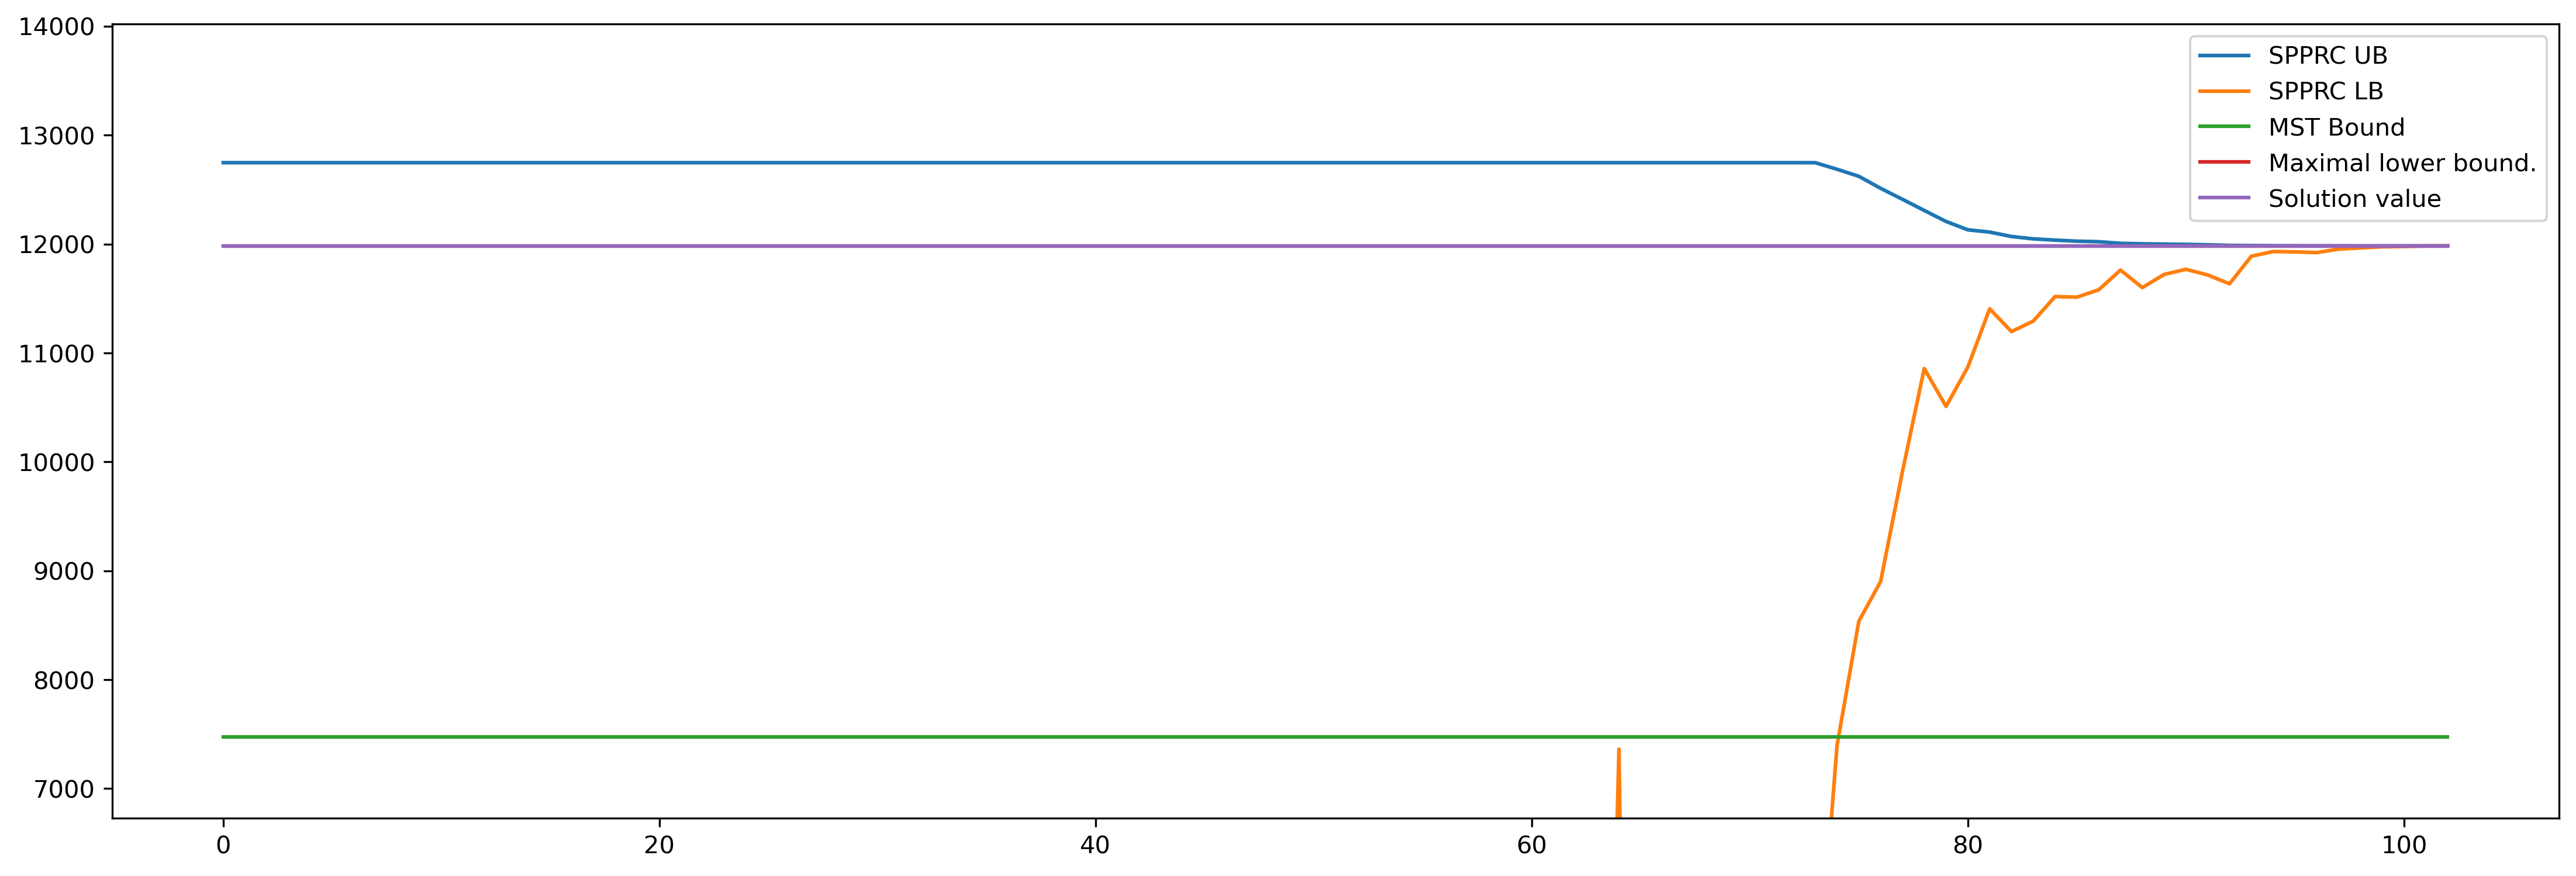

In [30]:
plt.figure(figsize=(18,6),dpi=300)
xmax, max_lb = 0, 0
for method in pricer.data['methods']:
    upper_bounds = [x for x,y in pricer.data['bounds'][method]]
    lower_bounds = [y for x,y in pricer.data['bounds'][method]]
    plt.plot(upper_bounds, label=f'{method} UB')
    plt.plot(lower_bounds, label=f'{method} LB')
    xmax = max(upper_bounds[0],xmax)
    if max(lower_bounds) > upper_bounds[-1]:
        print(f"The maximum lower bound for {method} is larger than the final bound")
    max_lb = max(max(lower_bounds),max_lb)

T = nx.minimum_spanning_tree(G)
mst = T.size(weight='weight') + min(G.edges().data('weight'),key=lambda edge: edge[2])[2]
mst = [mst for i in range(len(upper_bounds))]
plt.plot(mst, label="MST Bound")

max_lb = [max_lb for i in range(len(upper_bounds))]
plt.plot(max_lb, label="Maximal lower bound.")

solval = model.getObjVal()
sol = [solval for i in range(len(upper_bounds))]
plt.plot(sol,label="Solution value")

plt.ylim((mst[0]*0.9,xmax*1.1))

print(max_lb[0])

plt.legend(loc='upper right')
# plt.savefig("plots/X-n502-k39.svg")
plt.show()

In [31]:
output_variables(model, pricer)

The solution contains the following paths: 
Only paths with associated value larger than 1e-06 are analysed.
0.8319681677018629 * t_x10: (0, 10, 0)
The following path is non elementary
0.07989315466519435 * x668046: (0, 104, 41, 91, 2, 91, 41, 104, 0)
0.3527886892396993 * x673154: (0, 25, 51, 19, 6, 5, 0)
0.01930068175392219 * x675469: (0, 19, 6, 48, 108, 5, 0)
The following path is non elementary
0.16803183229813712 * x675474: (0, 59, 95, 107, 95, 107, 95, 107, 95, 107, 95, 59, 42, 10, 0)
The following path is non elementary
0.08563664596273116 * x678652: (0, 50, 53, 78, 54, 62, 94, 62, 94, 62, 94, 20, 101, 4, 0)
The following path is non elementary
0.23340760238033026 * x678688: (0, 81, 12, 45, 12, 65, 0)
The following path is non elementary
0.20930354300212617 * x679652: (0, 16, 5, 108, 5, 16, 0)
0.20930354300212617 * x679655: (0, 89, 5, 108, 6, 19, 0)
The following path is non elementary
0.010203586737384196 * x679665: (0, 15, 32, 89, 17, 66, 106, 3, 106, 66, 16, 66, 17, 32, 0)
The